# Title of the project 1: “Sales Data Analysis”
 
Purpose: Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.

Description: In this project, you will dive into a large sales dataset to extract valuable insights. You will explore sales trends over time, identify the best-selling products, calculate revenue metrics such as total sales and profit margins, and create visualizations to present your findings effectively. This project showcases your ability to manipulate and derive insights from large datasets, enabling you to make data-driven recommendations for optimizing sales strategies.


# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Reading data

In [2]:
df_sales = pd.read_csv('https://raw.githubusercontent.com/ShubhangiKumbhar28/LearningBuds_project-1/main/Sales%20Data.csv')

In [3]:
df_sales

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


# Analyze Data

In [4]:
df_sales.shape

(185950, 11)

In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
df_sales.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [7]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])

df_sales['year'] = df_sales['Order Date'].dt.year

In [8]:
df_sales['Date'] = df_sales['Order Date'].dt.date

In [9]:
df_sales.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour',
       'year', 'Date'],
      dtype='object')

In [10]:
df_sales['year'].unique()

array([2019, 2020], dtype=int64)

In [11]:
df_sales = df_sales.drop(columns=["Unnamed: 0"],  axis=1)

# Monthly Sales

In [12]:
manthly_sales = df_sales.groupby('Month')['Sales'].sum()

In [13]:
manthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

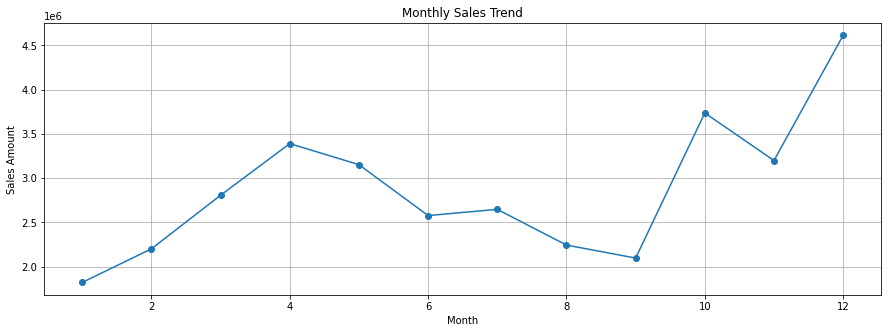

In [14]:
# Plotting  monthly sales
manthly_sales.plot(kind='line', marker='o', figsize=(15,5))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
# plt.show()


# Highest Sales Month:
December with a total of $4,613,443.34. This could be due to holiday shopping, as December often sees a surge in sales due to events like Christmas.



# Lowest Sales Month:
January with a total of $1,822,256.73. This drop could be attributed to post-holiday reductions in consumer spending.

# yearly sales Analysis

In [15]:
yearly_sales = df_sales.groupby('year')['Sales'].sum()
yearly_sales

year
2019    34483365.68
2020        8670.29
Name: Sales, dtype: float64

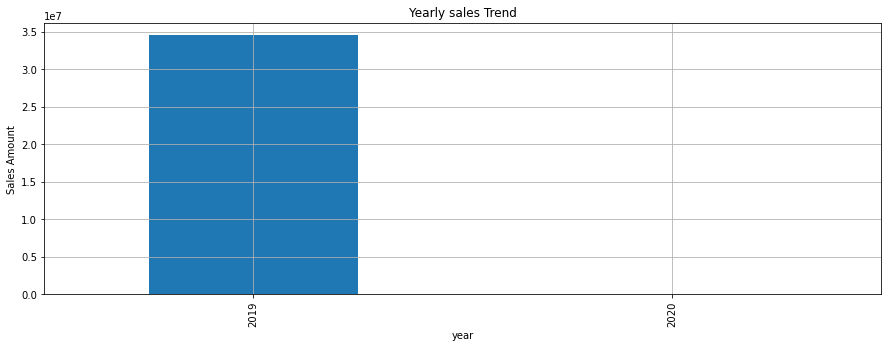

In [16]:
yearly_sales.plot(kind='bar', figsize=(15,5))
plt.title('Yearly sales Trend')
plt.ylabel('Sales Amount')
plt.xlabel('year')
plt.grid(True)
plt.show()

In [18]:
#  'Date' column is a datetime type
# df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Filter for the year 2019
df_sales = df_sales[df_sales['year'] == 2019]
df_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,year,Date
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,2019-12-30
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,2019-12-29
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,2019-12-12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,2019-12-22
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,2019-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,2019,2019-06-07
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,2019,2019-06-01
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019,2019-06-22
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019,2019-06-26


# Daily Sales

In [19]:
# daily_sales = df_sales.groupby('Date')['Sales'].sum()
# daily_sales
daily_sales = df_sales.groupby(['Date'], as_index=False)['Sales'].sum()
daily_sales #dataframe

,Date,Sales
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63
...,...,...
360,2019-12-27,126628.05
361,2019-12-28,134015.50
362,2019-12-29,156024.62
363,2019-12-30,152319.81


In [20]:
sorted_df = daily_sales.sort_values(by='Sales')
sorted_df


,Date,Sales
4,2019-01-05,46524.63
2,2019-01-03,47046.20
264,2019-09-22,47909.61
11,2019-01-12,48126.41
17,2019-01-18,48469.74
...,...,...
350,2019-12-17,157364.72
353,2019-12-20,160181.30
343,2019-12-10,162832.74
349,2019-12-16,162970.61


In [21]:
highest_sales_value = daily_sales['Sales'].max()
highest_sales_date = daily_sales[daily_sales['Sales'] == highest_sales_value]['Date'].values[0]

lowest_sales_value = daily_sales['Sales'].min()
lowest_sales_date = daily_sales[daily_sales['Sales'] == lowest_sales_value]['Date'].values[0]

print(f"The highest sales of ${highest_sales_value:,.2f} occurred on {highest_sales_date}.")
print(f"The lowest sales of ${lowest_sales_value:,.2f} occurred on {lowest_sales_date}.")


The highest sales of $166,727.69 occurred on 2019-12-04.
The lowest sales of $46,524.63 occurred on 2019-01-05.


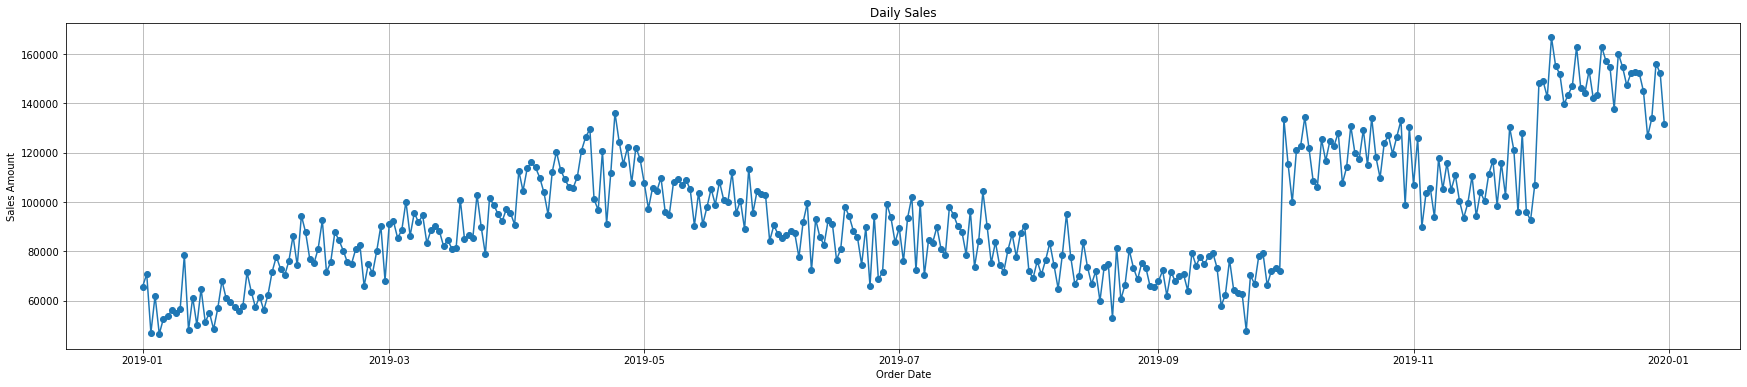

In [22]:
plt.figure(figsize=(30, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'],marker='o')
plt.title('Daily Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

# Hourly Sales

In [23]:
hourly_sales = df_sales.groupby('Hour')['Sales'].sum()
hourly_sales

Hour
0      711060.59
1      458561.97
2      232586.50
3      144697.99
4      162396.09
5      230564.88
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

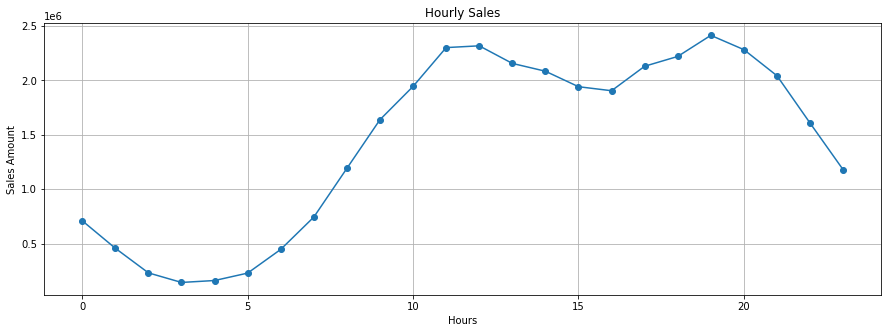

In [24]:
hourly_sales.plot(kind='line', marker = 'o', figsize=(15,5))
plt.title("Hourly Sales")
plt.xlabel("Hours")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

Peak Hours: The sales activity increasing between 11 AM and 1 PM. This might be attributed to lunch break shopping or online shopping trends during working hours.

Off-Peak Hours: Early morning hours, specifically from midnight to 6 AM, show the lowest sales figures. This period of low activity could be utilized for system maintenance .

# product wise sales

In [25]:
product_sales = df_sales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
product_sales

Product
Macbook Pro Laptop            8035900.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3318600.00
27in 4K Gaming Monitor        2434707.57
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2348550.00
Flatscreen TV                 1445400.00
Bose SoundSport Headphones    1345265.46
27in FHD Monitor              1131974.53
Vareebadd Phone                826800.00
20in Monitor                   453818.74
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347004.45
USB-C Charging Cable           286453.45
Wired Headphones               246430.47
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92725.88
Name: Sales, dtype: float64

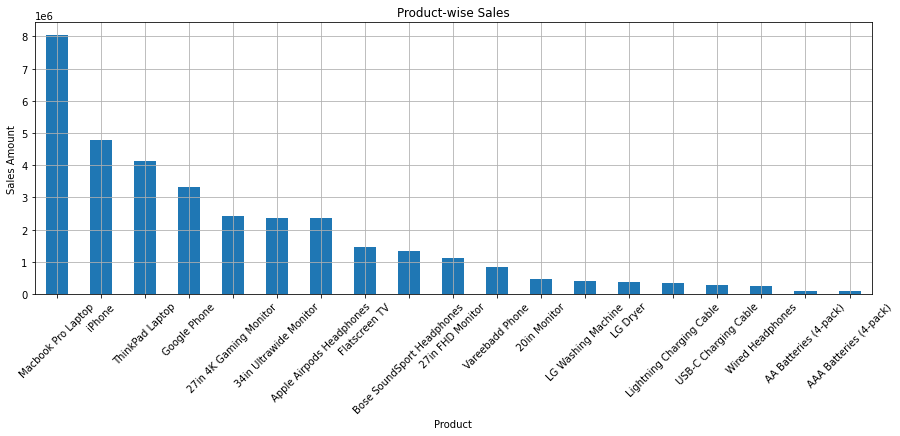

In [26]:
# Plotting product-wise sales
product_sales.plot(kind='bar', figsize=(15,5))
plt.title('Product-wise Sales')
plt.ylabel('Sales Amount')
plt.xlabel('Product')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Top Sellers: The 'Macbook Pro Laptop', 'iPhone', and 'ThinkPad Laptop' are the leading products in terms of sales, indicating a strong demand for high-end tech items.

Lower Revenue Items: Everyday items like cables and batteries,.. showing their essential nature and consistent demand.

# Revenue metrics 

In [27]:
df_sales['Profit'] = df_sales['Sales'] - (df_sales['Price Each'] * df_sales['Quantity Ordered'])

In [28]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,year,Date,Profit
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,2019-12-30,0.0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,2019-12-29,0.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,2019-12-12,0.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,2019-12-22,0.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,2019-12-18,0.0


In [29]:
total_sales = df_sales['Sales'].sum()
print("Total Sales:",total_sales)

Total Sales: 34483365.68


In [30]:
profit_margins = df_sales['Sales'] - df_sales['Price Each']
total_profit = df_sales['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100
print(f"Profit Margin: {profit_margin:.2f}%")

Profit Margin: 0.00%


In [31]:
monthly_profit = df_sales.groupby('Month')['Profit'].sum()
monthly_sales_margin = df_sales.groupby('Month')['Sales'].sum()
monthly_profit_margin = (monthly_profit/monthly_sales_margin)*100
monthly_profit_margin

Month
1     2.252785e-18
2     1.371379e-18
3     1.645302e-18
4     1.257349e-18
5     3.380739e-19
6     3.238758e-18
7     2.817723e-18
8     3.957189e-19
9     1.778423e-18
10    9.982933e-19
11    1.332433e-18
12    1.155118e-18
dtype: float64

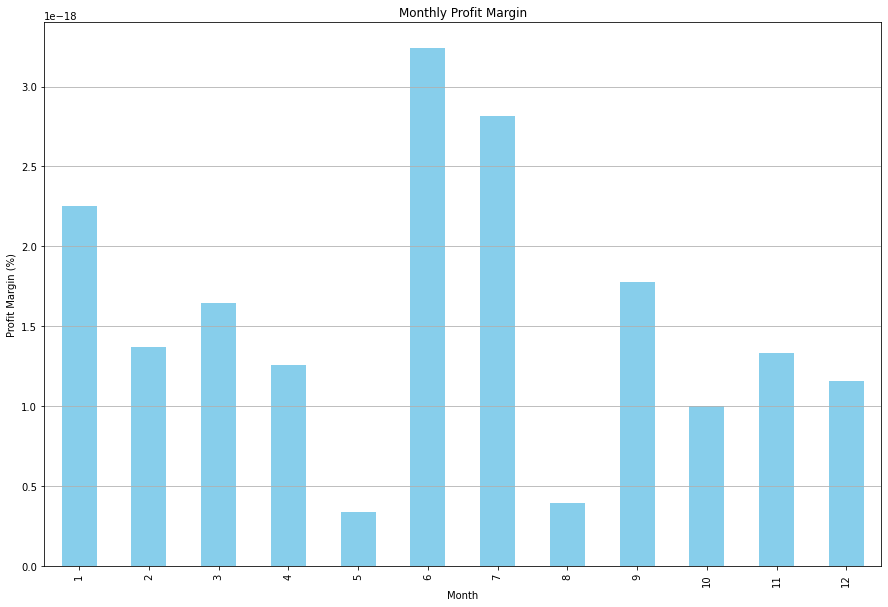

In [32]:
monthly_profit_margin.plot(kind = 'bar', figsize=(15,10), color='skyblue')
plt.title('Monthly Profit Margin')
plt.xlabel('Month')
plt.ylabel('Profit Margin (%)')
plt.grid(axis='y')
plt.show()

# Sales reached $3,44,83,365.68, but with a 0.00% profit margin, profitability is a concern despite high revenue. 

In [33]:
product_profit = df_sales.groupby('Product')['Profit'].sum().sort_values(ascending=False)
product_profit

Product
Lightning Charging Cable      6.892265e-13
Bose SoundSport Headphones    1.136868e-13
20in Monitor                  0.000000e+00
LG Dryer                      0.000000e+00
Wired Headphones              0.000000e+00
Vareebadd Phone               0.000000e+00
USB-C Charging Cable          0.000000e+00
ThinkPad Laptop               0.000000e+00
Macbook Pro Laptop            0.000000e+00
LG Washing Machine            0.000000e+00
Google Phone                  0.000000e+00
27in 4K Gaming Monitor        0.000000e+00
Flatscreen TV                 0.000000e+00
Apple Airpods Headphones      0.000000e+00
AA Batteries (4-pack)         0.000000e+00
34in Ultrawide Monitor        0.000000e+00
27in FHD Monitor              0.000000e+00
iPhone                        0.000000e+00
AAA Batteries (4-pack)       -2.948752e-13
Name: Profit, dtype: float64

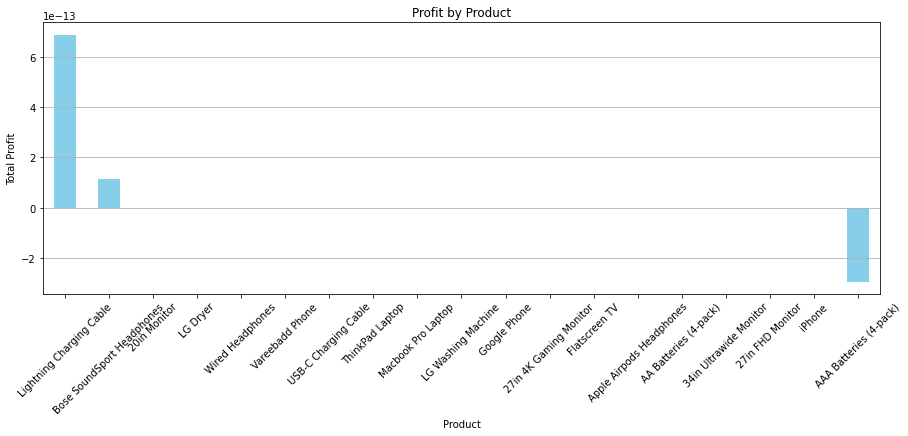

In [34]:
product_profit.plot(kind='bar', figsize=(15,5), color='skyblue')
plt.title('Profit by Product')
plt.ylabel('Total Profit')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Marginal Profit: Only a few products, like the 'Lightning Charging Cable' and 'Bose SoundSport Headphones', have shown some positive profit margins, but close to zero.

Zero Profit: The majority of the products, ranging from high-end items like 'Macbook Pro Laptop' to  'Wired Headphones', have zero profit.

Negative Profit: A product like 'AAA Batteries (4-pack)' has a negative profit margin, indicating a potential loss on sales.